<a href="https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Training: Omics, Bioinformatics, and Pharmacogenomics

By **Nuno S. Osório** 🖋️

👋 Welcome to this tutorial! We will explore how to access and use omics-related databases. We will focus on retrieving data from **UniProt**. This tutorial is designed to be run on jupyter notebook environments and includes exercises that involve running Python code. 🐍💻

You can access an interactive cloud version of the notebook here (https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_II.ipynb).

Let's dive in! 🏊‍♂️


# Introduction

Welcome to this practical exploration of omics and its significant role in drug development.

## Omics 🧬

Omics is an integrative field of study in biology that encompasses disciplines such as genomics, proteomics, and metabolomics. The goal of omics is to collectively characterize and quantify pools of biological molecules, providing a holistic view of the structure, function, and dynamics of an organism.

## Omics in Drug Development 💊

In drug development, omics technologies play a crucial role in understanding the molecular mechanisms of diseases. This molecular-level understanding aids in the identification of potential drug targets and the development of effective therapeutic agents.

## Databases in Omics Research 🗃️

Bioinformatics databases are essential resources in omics research. These databases, such as the [Ensembl](https://www.ensembl.org/index.html), or [UniProt](https://www.uniprot.org/), and others store a wealth of omics data. Accessing and analyzing this data is a critical step in drug discovery and development.

## Programmatic Access to Databases 💻

For large-scale and reproducible analysis, programmatic access to these databases is often more efficient than manual data retrieval through web interfaces. Python, a popular language in bioinformatics, offers several ways to assist in this purpose. 🐍

In the following sections of this tutorial, we will delve deeper into how to use Python for accessing UniProt and analysing the data.


# UniProt Web Interface
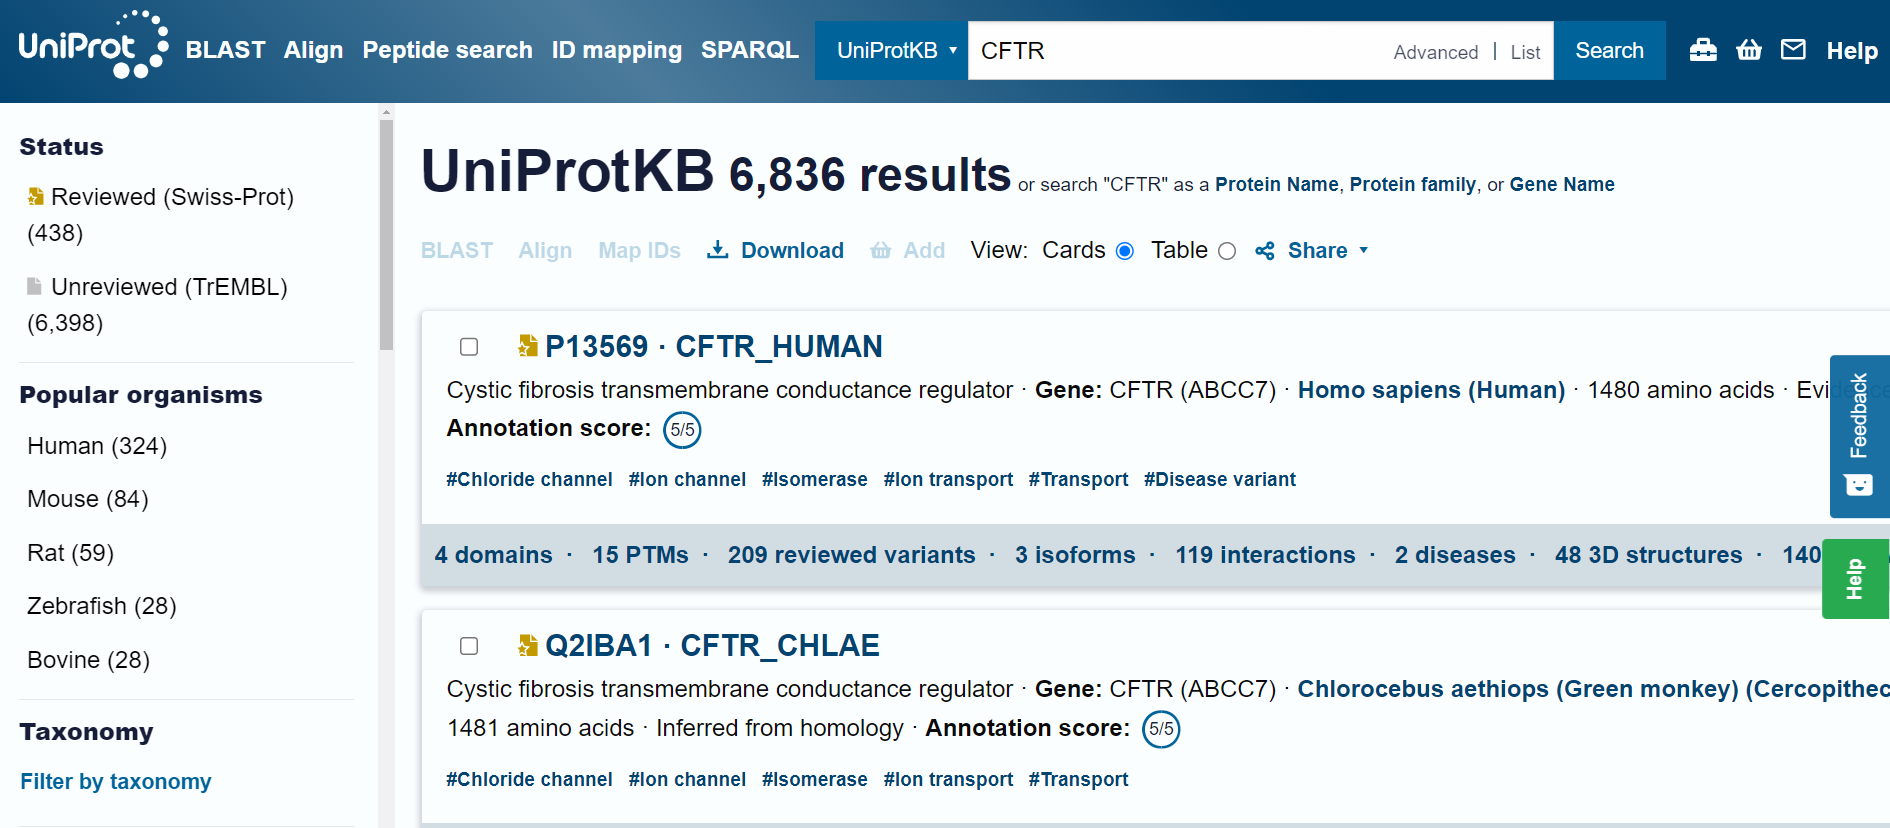

Begin by visiting the [UniProt website](https://www.uniprot.org), which has an elegant and functional design.

Initiate a search for "CFTR" and select the first result that appears. You'll observe that the UniProt ID of this protein is **P13569**.

As you scroll down the page, you'll encounter several layers of valuable information about the protein. Take your time to explore the available features. Upon reaching the end of the page, you'll find the protein sequence and a button to download it in FASTA format.

FASTA is a widely used format for sequences in bioinformatics, serving a broad range of analyses.

# Accessing UniProt Using Python

Retrieving protein sequences through a web browser and interface can be time-consuming and lacks reproducibility, especially when dealing with multiple proteins.

Python, along with libraries like BioPython's SeqIO, can be employed to streamline this process. The initial steps involve installing the necessary libraries, importing them into your script, and defining a function to fetch the protein sequences.


In [ ]:
!pip install biopython
import requests
from Bio import SeqIO
from tempfile import NamedTemporaryFile
import os

def sequence_for_uniprot_id(uniprot_id):
    r = requests.get(f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta")
    r.raise_for_status()

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
        tmp.write(r.text)

    sequence = SeqIO.read(tmp.name, format="fasta")
    os.remove(tmp.name)

    return sequence

In [ ]:
# Now you can get the sequence for any list of proteins by its UniProt IDs
uniprot_ids = ["P13569","Q2IBA1","P35071","Q07DX5","Q2IBE4"]
for uniprot_id in uniprot_ids:
    sequence = sequence_for_uniprot_id(uniprot_id)
    print(f"UniProt ID: {uniprot_id}")
    print(f"Description: {sequence.description}")
    print(f"Sequence: {sequence.seq}\n")

## Case-based Exercise: Protein Sequence Comparison

In this exercise, you will compare the protein sequences of two cystic fibrosis patients. Clinical samples from these patients were sequenced, and the protein sequences of the CFTR protein were obtained.

**Patient Details:**

- **Patient 1**: A 28-year-old male diagnosed with cystic fibrosis at age 3.
```
>p1_CFTR
MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLERKWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL
```

- **Patient 2**: A 32-year-old female diagnosed with cystic fibrosis in her late teens.
```
>p2_CFTR
MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL
```

**Task:**

1. Retrieve the "reference" FASTA sequence of the CFTR protein (UniProt ID P13569).
2. Perform pairwise alignments to compare the two sequences the CFTR proteins from the patients with P13569.
3. Based on the alignment results, speculate whether Ivacaftor is more likely to improve the function of CFTR in which of the patients?

Consider that Ivacaftor has been approved for use with the following amino acid substitutions:

|       |       |       |       |       |
|-------|-------|-------|-------|-------|
| E56K  | G178R | S549R | K1060T| G1244E|
| P67L  | E193K | G551D | A1067T| S1251N|
| R74W  | L206W | G551S | G1069R| S1255P|
| D110E | R347H | D579G | R1070Q| D1270N|
| D110H | R352Q | S945L | R1070W| G1349D|
| R117C | A455E | S977F | F1074L|       |
| R117H | S549N | F1052V| D1152H|       |

For more information,click [here](https://pi.vrtx.com/files/uspi_ivacaftor.pdf)

Please write your code in the cell below.

Disclaimer: Please note that this is a teaching exercise designed for educational purposes only. The results and interpretations derived from this exercise should not be used for real-world clinical decision-making or diagnosis.


In [10]:
import requests
from Bio import SeqIO
from tempfile import NamedTemporaryFile
import os
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def sequence_for_uniprot_id(uniprot_id):
    r = requests.get(f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta")
    r.raise_for_status()

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
        tmp.write(r.text)

    sequence = SeqIO.read(tmp.name, format="fasta")
    os.remove(tmp.name)

    return sequence

# Retrieve sequences
seq0 = sequence_for_uniprot_id("P13569")
seq1 = "MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLERKWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL"
seq2 = "MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL"

# Perform pairwise alignments
alignments1 = pairwise2.align.globalxx(seq0.seq, seq1)
alignments2 = pairwise2.align.globalxx(seq0.seq, seq2)

# List of amino acid positions of interest
positions_of_interest = [56, 178, 549, 1060, 1244, 67, 193, 551, 1067, 1251, 74, 206, 551, 1069, 1255, 110, 347, 579, 1070, 1270, 110, 352, 945, 1070, 1349, 117, 455, 977, 1074, 117, 549, 1052, 1152]

# Sort the list
positions_of_interest.sort()

# Function to print amino acids of interest
def print_amino_acids_of_interest(alignment, positions_of_interest):
    for i in range(len(alignment[0])):
        if i in positions_of_interest:
            print(f"Position: {i}, Ref: {alignment[0][i]}, Patient: {alignment[1][i]}")


In [ ]:
# Print positions of interest in alignment for the sequence from patient 1
print_amino_acids_of_interest(alignments1[0], positions_of_interest)

In [ ]:
# Print positions of interest in alignment for the sequence from patient 2
print_amino_acids_of_interest(alignments2[0], positions_of_interest)


In [ ]:
# inspect the complete aligments for the sequence from patient 1
alignments1

## Conclusion

Congratulations on completing the tutorial! 🎉 You've learned how to access UniProt database using Python. You've also performed a simple aminoacid sequence analysis relating bioinformatics and pharmacogenomics.

Keep practicing and exploring these topics. There's a wealth of information waiting to be discovered! 🚀


# 🎁 Bonus






1. What is the mechanism of action of Ivacaftor and the molecular basis of cystic fibrosis?
2. Could Patient 2 also benefit from Ivacaftor? If so, under what circumstances? What would be the most likely genetic basis of his disease?
3. What other advanced alignment tools could you use to investigate the sequences from the patients?
4. What helpful information could you retrieve from UniProt?
5. How does the age of diagnosis potentially impact the progression and treatment of the disease in both patients?
6. How might future advancements in genomics and genetic engineering influence the treatment of cystic fibrosis?


# MIT License

Copyright (c) 2024 Nuno S. Osório